# Предсказание ротамеров угла $\chi_1$ в зависимости от окружения

Дедлайн 4 декабря

In [1]:
import json
import pandas as pd
import numpy as np

In [4]:
#dpath = "/Users/andreyignatov/Downloads/SER_data.csv" 
dpath =  "./ILE_data.csv"

In [5]:
df = pd.read_csv(dpath)

In [6]:
df.head()

,Unnamed: 0,pbd_indx,phi,psi,tau,alpha,ind_from_start,ind_from_end,sec_structure,is_tail,...,gamma14,alpha15,beta15,gamma15,alpha16,beta16,gamma16,alpha17,beta17,gamma17
0,0,2BO5,-132.673875,143.415464,131.682519,132.908004,10,109,-,0,...,149.497815,41.249609,45.624462,87.362901,35.804617,97.974890,123.708933,43.206417,128.453892,80.477189
1,1,2BO5,-58.525876,-46.093168,91.839903,39.513266,13,106,H,0,...,70.701617,40.707637,52.906550,59.405290,58.525391,125.539369,66.865025,43.699178,96.296884,52.406747
2,2,2BO5,-65.144927,-32.202032,89.886732,49.391530,44,75,H,0,...,53.288917,14.692650,113.218466,75.453066,54.015264,62.254251,70.714861,131.691470,92.295745,47.250501
3,3,2BO5,-67.271147,-49.556771,94.279261,38.174192,85,34,H,0,...,143.678835,109.953109,103.997430,31.013922,29.953156,90.677448,67.046059,68.871953,49.519534,64.581228
4,4,2BO5,-67.401125,-38.312026,91.813249,57.449097,101,18,H,0,...,82.929903,96.622779,105.015224,55.540807,54.778124,56.230851,144.518962,20.361839,10.698696,85.074644


# Часть 2. Предсказание ротамеров $\chi_1$

В этой части Вам предстоит применить методы Машинного Обучения (деревья решений) к задаче предсказания ротамеров Вашей аминокислоты.

## Задание 2.1. Вернемся к датасету из части 1. Добавьте колонку chi_class, которая получается преобразованием значений из колонки chi_1 к классам.

In [34]:
# изменение угла (x+ pi)//(2*pi/18)

In [10]:
from math import pi

In [11]:
t = []
for i in df["chi_1"]:
    t.append((i+pi)//(2*pi/18))

In [12]:
t

[-488.0,
 -476.0,
 -158.0,
 -308.0,
 -144.0,
 -156.0,
 162.0,
 -198.0,
 -135.0,
 -164.0,
 185.0,
 -125.0,
 -259.0,
 151.0,
 91.0,
 -170.0,
 -501.0,
 -132.0,
 65.0,
 90.0,
 -195.0,
 -180.0,
 -429.0,
 210.0,
 -142.0,
 -161.0,
 -148.0,
 -180.0,
 -151.0,
 -181.0,
 -133.0,
 -172.0,
 -171.0,
 -204.0,
 -156.0,
 -494.0,
 -477.0,
 -189.0,
 -175.0,
 -469.0,
 -149.0,
 -181.0,
 -155.0,
 -191.0,
 -175.0,
 -179.0,
 -185.0,
 -198.0,
 -190.0,
 -154.0,
 -127.0,
 -215.0,
 -207.0,
 -193.0,
 -196.0,
 205.0,
 -126.0,
 -164.0,
 -452.0,
 253.0,
 515.0,
 -167.0,
 -158.0,
 -160.0,
 173.0,
 -492.0,
 -170.0,
 -179.0,
 -158.0,
 -201.0,
 -180.0,
 -458.0,
 -150.0,
 -165.0,
 -133.0,
 -357.0,
 -206.0,
 -148.0,
 -184.0,
 -145.0,
 -145.0,
 -484.0,
 -172.0,
 -176.0,
 204.0,
 -165.0,
 -127.0,
 -186.0,
 191.0,
 -152.0,
 -133.0,
 -151.0,
 517.0,
 -140.0,
 -177.0,
 189.0,
 213.0,
 -181.0,
 -173.0,
 -211.0,
 -452.0,
 -221.0,
 -183.0,
 -468.0,
 -213.0,
 227.0,
 224.0,
 185.0,
 -190.0,
 -495.0,
 -446.0,
 -158.0,
 -244.0,
 267.

In [13]:
df['chi_class'] = t

## Задание 2.2. Теперь давайте дискретизируем значения $\phi, \psi, \alpha$. Каждому значению из $[-\pi, \pi]$ нужно поставить в соответствие номер блока длиной 20 градусов, в который он попадает.

**Комментарий**: обратите внимание, значения могут быть отрицательными. А номер блока нет 🤔

In [14]:
# всего 18 классов

In [15]:
block = []
for i in t:
    if i%20 == 0:
        block.append(abs(i//20))
    else:
        block.append(abs(i//20+i%20))
block

[13.0,
 20.0,
 6.0,
 4.0,
 8.0,
 4.0,
 10.0,
 8.0,
 2.0,
 7.0,
 14.0,
 8.0,
 12.0,
 18.0,
 15.0,
 1.0,
 7.0,
 1.0,
 8.0,
 14.0,
 5.0,
 9.0,
 11.0,
 20.0,
 10.0,
 10.0,
 4.0,
 9.0,
 1.0,
 9.0,
 0.0,
 1.0,
 0.0,
 5.0,
 4.0,
 19.0,
 21.0,
 1.0,
 4.0,
 13.0,
 3.0,
 9.0,
 3.0,
 1.0,
 4.0,
 8.0,
 5.0,
 8.0,
 0.0,
 2.0,
 6.0,
 6.0,
 2.0,
 3.0,
 6.0,
 15.0,
 7.0,
 7.0,
 15.0,
 25.0,
 40.0,
 4.0,
 6.0,
 8.0,
 21.0,
 17.0,
 1.0,
 8.0,
 6.0,
 8.0,
 9.0,
 21.0,
 2.0,
 6.0,
 0.0,
 15.0,
 3.0,
 4.0,
 6.0,
 7.0,
 7.0,
 9.0,
 1.0,
 5.0,
 14.0,
 6.0,
 6.0,
 4.0,
 20.0,
 0.0,
 0.0,
 1.0,
 42.0,
 7.0,
 6.0,
 18.0,
 23.0,
 9.0,
 2.0,
 2.0,
 15.0,
 7.0,
 7.0,
 12.0,
 4.0,
 18.0,
 15.0,
 14.0,
 0.0,
 20.0,
 9.0,
 6.0,
 3.0,
 20.0,
 25.0,
 0.0,
 4.0,
 3.0,
 4.0,
 2.0,
 2.0,
 8.0,
 9.0,
 1.0,
 2.0,
 5.0,
 2.0,
 6.0,
 25.0,
 5.0,
 3.0,
 8.0,
 8.0,
 0.0,
 5.0,
 10.0,
 8.0,
 4.0,
 21.0,
 4.0,
 16.0,
 2.0,
 11.0,
 8.0,
 15.0,
 1.0,
 0.0,
 7.0,
 2.0,
 1.0,
 4.0,
 1.0,
 12.0,
 14.0,
 6.0,
 25.0,
 4.0,
 5.0,
 3.0,
 

In [16]:
df['block'] = block

## Задание 2.3. В датасете есть текстовые признаки! Так как они категориальные, их значения можно поменять на натуральные числа. Пронумеруйте все уникальные значения таких признаков и измените текстовые значения на соответствующие номера. 

In [17]:
df = df.drop(['Unnamed: 0'], axis=1)
df

,pbd_indx,phi,psi,tau,alpha,ind_from_start,ind_from_end,sec_structure,is_tail,chi_1,...,beta15,gamma15,alpha16,beta16,gamma16,alpha17,beta17,gamma17,chi_class,block
0,2BO5,-132.673875,143.415464,131.682519,132.908004,10,109,-,0,-173.454724,...,45.624462,87.362901,35.804617,97.974890,123.708933,43.206417,128.453892,80.477189,-488.0,13.0
1,2BO5,-58.525876,-46.093168,91.839903,39.513266,13,106,H,0,-169.000874,...,52.906550,59.405290,58.525391,125.539369,66.865025,43.699178,96.296884,52.406747,-476.0,20.0
2,2BO5,-65.144927,-32.202032,89.886732,49.391530,44,75,H,0,-57.954325,...,113.218466,75.453066,54.015264,62.254251,70.714861,131.691470,92.295745,47.250501,-158.0,6.0
3,2BO5,-67.271147,-49.556771,94.279261,38.174192,85,34,H,0,-110.633803,...,103.997430,31.013922,29.953156,90.677448,67.046059,68.871953,49.519534,64.581228,-308.0,4.0
4,2BO5,-67.401125,-38.312026,91.813249,57.449097,101,18,H,0,-53.128974,...,105.015224,55.540807,54.778124,56.230851,144.518962,20.361839,10.698696,85.074644,-144.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63041,5X1X,-121.353153,126.716381,124.146485,-144.929397,78,51,E,0,-85.049371,...,142.713770,98.575763,128.941322,45.503916,56.835975,68.407924,172.074909,94.987919,-235.0,7.0
63042,5X1X,-100.731831,101.492657,110.033866,143.276514,101,28,-,0,-71.525675,...,132.837890,66.013573,42.864891,97.835056,127.403928,42.556767,80.423456,132.556159,-196.0,6.0
63043,5X1X,-73.092971,-30.659857,91.436514,42.510484,106,23,T,0,-56.233248,...,125.127891,83.346626,71.770644,172.688151,93.315752,86.056729,30.563075,100.715354,-153.0,1.0
63044,5X1X,-46.594126,-55.146881,91.555714,40.063601,119,10,H,0,-89.346228,...,105.615707,116.902444,59.775282,18.430398,82.098894,54.403891,50.741328,40.997152,-247.0,0.0


In [18]:
df_copy = df.copy()

In [19]:
df.head()

,pbd_indx,phi,psi,tau,alpha,ind_from_start,ind_from_end,sec_structure,is_tail,chi_1,...,beta15,gamma15,alpha16,beta16,gamma16,alpha17,beta17,gamma17,chi_class,block
0,2BO5,-132.673875,143.415464,131.682519,132.908004,10,109,-,0,-173.454724,...,45.624462,87.362901,35.804617,97.974890,123.708933,43.206417,128.453892,80.477189,-488.0,13.0
1,2BO5,-58.525876,-46.093168,91.839903,39.513266,13,106,H,0,-169.000874,...,52.906550,59.405290,58.525391,125.539369,66.865025,43.699178,96.296884,52.406747,-476.0,20.0
2,2BO5,-65.144927,-32.202032,89.886732,49.391530,44,75,H,0,-57.954325,...,113.218466,75.453066,54.015264,62.254251,70.714861,131.691470,92.295745,47.250501,-158.0,6.0
3,2BO5,-67.271147,-49.556771,94.279261,38.174192,85,34,H,0,-110.633803,...,103.997430,31.013922,29.953156,90.677448,67.046059,68.871953,49.519534,64.581228,-308.0,4.0
4,2BO5,-67.401125,-38.312026,91.813249,57.449097,101,18,H,0,-53.128974,...,105.015224,55.540807,54.778124,56.230851,144.518962,20.361839,10.698696,85.074644,-144.0,8.0


### найдем колонки с нечисленными значениями

In [20]:
num_col = df.select_dtypes(include=np.number).columns.tolist()
not_num_col = list(set(df.columns.tolist()) - set(num_col))
not_num_col = sorted(not_num_col)
not_num_col

['n_10_charge_group',
 'n_10_chemical_group',
 'n_10_hydrogen_donor_acceptor_group',
 'n_10_hydropathy_group',
 'n_10_physicochemical_group',
 'n_10_polarity_group',
 'n_10_volume_group',
 'n_11_charge_group',
 'n_11_chemical_group',
 'n_11_hydrogen_donor_acceptor_group',
 'n_11_hydropathy_group',
 'n_11_physicochemical_group',
 'n_11_polarity_group',
 'n_11_volume_group',
 'n_12_charge_group',
 'n_12_chemical_group',
 'n_12_hydrogen_donor_acceptor_group',
 'n_12_hydropathy_group',
 'n_12_physicochemical_group',
 'n_12_polarity_group',
 'n_12_volume_group',
 'n_13_charge_group',
 'n_13_chemical_group',
 'n_13_hydrogen_donor_acceptor_group',
 'n_13_hydropathy_group',
 'n_13_physicochemical_group',
 'n_13_polarity_group',
 'n_13_volume_group',
 'n_14_charge_group',
 'n_14_chemical_group',
 'n_14_hydrogen_donor_acceptor_group',
 'n_14_hydropathy_group',
 'n_14_physicochemical_group',
 'n_14_polarity_group',
 'n_14_volume_group',
 'n_15_charge_group',
 'n_15_chemical_group',
 'n_15_hydroge

In [21]:
len(not_num_col)

138

In [22]:
df.applymap(lambda x: isinstance(x, (int, float))) # we need false

,pbd_indx,phi,psi,tau,alpha,ind_from_start,ind_from_end,sec_structure,is_tail,chi_1,...,beta15,gamma15,alpha16,beta16,gamma16,alpha17,beta17,gamma17,chi_class,block
0,False,True,True,True,True,True,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True
1,False,True,True,True,True,True,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True
2,False,True,True,True,True,True,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True
3,False,True,True,True,True,True,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True
4,False,True,True,True,True,True,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63041,False,True,True,True,True,True,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True
63042,False,True,True,True,True,True,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True
63043,False,True,True,True,True,True,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True
63044,False,True,True,True,True,True,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True


In [23]:
from random import seed
from random import random
import time
seed(1)

### выберем все униклаьные значения в нужных колонках

In [24]:
#chose unique values from dataframe not int of float type
cur = set()
for i in not_num_col:
    cur_ = set(df[i])
    cur = cur.union(cur_)  

In [25]:
len(cur)

6109

In [26]:
dict_uniq = {}
for i in cur:
    dict_uniq[i] = len(dict_uniq)
dict_uniq

{nan: 0,
 '3D4M': 1,
 '6IYE': 2,
 '1XEU': 3,
 '5P24': 4,
 '1FC7': 5,
 '2K8P': 6,
 '2LLY': 7,
 '5P09': 8,
 '2L59': 9,
 '3DHM': 10,
 '1U3M': 11,
 '6DNM': 12,
 '2LXF': 13,
 '5H3M': 14,
 '5Y03': 15,
 '3O48': 16,
 '4AR0': 17,
 '1WFY': 18,
 '1WX7': 19,
 '1PGS': 20,
 '1A67': 21,
 '2R2Y': 22,
 '1HEQ': 23,
 '2DLT': 24,
 '2OUT': 25,
 '2KFL': 26,
 '2DLY': 27,
 '1PBN': 28,
 '1KVB': 29,
 '2MX7': 30,
 '2L6C': 31,
 '1M7T': 32,
 '5P2H': 33,
 '5P4X': 34,
 '2MBF': 35,
 '5M8A': 36,
 '5P57': 37,
 '1Z7R': 38,
 '1DZD': 39,
 '1UIE': 40,
 '2EYM': 41,
 '5Y50': 42,
 '1COF': 43,
 '1XAX': 44,
 '1GDF': 45,
 '3B21': 46,
 '2KFS': 47,
 '2LFU': 48,
 '2YRU': 49,
 '1CYE': 50,
 '2A3S': 51,
 '6ISA': 52,
 '1EHA': 53,
 '1ANG': 54,
 '2RUQ': 55,
 '5EEP': 56,
 '5KQP': 57,
 '5P8P': 58,
 '1JPH': 59,
 '5E8S': 60,
 '2G2D': 61,
 '5P71': 62,
 '6C2V': 63,
 'HYDROXYL': 64,
 '5WOX': 65,
 '2HVM': 66,
 '5A3G': 67,
 '1P7S': 68,
 '2YUD': 69,
 '1PSN': 70,
 '6AR0': 71,
 '2KL6': 72,
 '2DB2': 73,
 '1E1G': 74,
 '1DUA': 75,
 '1WFV': 76,
 '5J7N':

In [27]:
df.head()

,pbd_indx,phi,psi,tau,alpha,ind_from_start,ind_from_end,sec_structure,is_tail,chi_1,...,beta15,gamma15,alpha16,beta16,gamma16,alpha17,beta17,gamma17,chi_class,block
0,2BO5,-132.673875,143.415464,131.682519,132.908004,10,109,-,0,-173.454724,...,45.624462,87.362901,35.804617,97.974890,123.708933,43.206417,128.453892,80.477189,-488.0,13.0
1,2BO5,-58.525876,-46.093168,91.839903,39.513266,13,106,H,0,-169.000874,...,52.906550,59.405290,58.525391,125.539369,66.865025,43.699178,96.296884,52.406747,-476.0,20.0
2,2BO5,-65.144927,-32.202032,89.886732,49.391530,44,75,H,0,-57.954325,...,113.218466,75.453066,54.015264,62.254251,70.714861,131.691470,92.295745,47.250501,-158.0,6.0
3,2BO5,-67.271147,-49.556771,94.279261,38.174192,85,34,H,0,-110.633803,...,103.997430,31.013922,29.953156,90.677448,67.046059,68.871953,49.519534,64.581228,-308.0,4.0
4,2BO5,-67.401125,-38.312026,91.813249,57.449097,101,18,H,0,-53.128974,...,105.015224,55.540807,54.778124,56.230851,144.518962,20.361839,10.698696,85.074644,-144.0,8.0


In [28]:
type('H')==str

True

### теперь заменим все на сгенерированные числовые значения

In [29]:
%%time
for i in not_num_col:
    print(i)
    start_time = time.time()
    for j in (df[i].unique()):
        print(j)
        if type(j)==str:
            df = df.replace(to_replace = j, value = dict_uniq[j])
    end_time = time.time()
       # df.replace(dict_uniq)
    print(' for {} all values are replaced and it took {}'.format(i,end_time-start_time))

n_10_charge_group
-CHARGED
UNCHARGED
+CHARGED
 for n_10_charge_group all values are replaced and it took 1.1856181621551514
n_10_chemical_group
ACIDIC
HYDROXYL
ALIPHATIC
BASIC
AROMATIC
SULFUR
AMIDE
 for n_10_chemical_group all values are replaced and it took 4.240761995315552
n_10_hydrogen_donor_acceptor_group
ACCEPTOR
DONOR-ACCEPTOR
NONE
DONOR
 for n_10_hydrogen_donor_acceptor_group all values are replaced and it took 1.4972190856933594
n_10_hydropathy_group
HYDROPHILIC
NEUTRAL
HYDROPHOBIC
 for n_10_hydropathy_group all values are replaced and it took 0.8812389373779297
n_10_physicochemical_group
5929
64
5541
2929
F
G
1984
2026
P
Y
W
 for n_10_physicochemical_group all values are replaced and it took 2.3052327632904053
n_10_polarity_group
POLAR
NONPOLAR
 for n_10_polarity_group all values are replaced and it took 1.1129381656646729
n_10_volume_group
MEDIUM
SMALL
LARGE
VERY_SMALL
VERY_LARGE
 for n_10_volume_group all values are replaced and it took 1.702253818511963
n_11_charge_group
3

In [57]:
len(df['n_10_charge_group'])

62825

In [58]:
np.unique(df['n_10_charge_group'])

array([3098, 3876, 4694])

In [59]:
df.head()

,pbd_indx,phi,psi,tau,alpha,ind_from_start,ind_from_end,sec_structure,is_tail,chi_1,...,beta15,gamma15,alpha16,beta16,gamma16,alpha17,beta17,gamma17,chi_class,block
0,2559,-132.673875,143.415464,131.682519,132.908004,10,109,2066.0,0,-173.454724,...,45.624462,87.362901,35.804617,97.974890,123.708933,43.206417,128.453892,80.477189,-488.0,13.0
1,2559,-58.525876,-46.093168,91.839903,39.513266,13,106,4818.0,0,-169.000874,...,52.906550,59.405290,58.525391,125.539369,66.865025,43.699178,96.296884,52.406747,-476.0,20.0
2,2559,-65.144927,-32.202032,89.886732,49.391530,44,75,4818.0,0,-57.954325,...,113.218466,75.453066,54.015264,62.254251,70.714861,131.691470,92.295745,47.250501,-158.0,6.0
3,2559,-67.271147,-49.556771,94.279261,38.174192,85,34,4818.0,0,-110.633803,...,103.997430,31.013922,29.953156,90.677448,67.046059,68.871953,49.519534,64.581228,-308.0,4.0
4,2559,-67.401125,-38.312026,91.813249,57.449097,101,18,4818.0,0,-53.128974,...,105.015224,55.540807,54.778124,56.230851,144.518962,20.361839,10.698696,85.074644,-144.0,8.0


In [60]:
#check if there are any not numeric columns

In [61]:
num_col = df.select_dtypes(include=np.number).columns.tolist()
not_num_col = list(set(df.columns.tolist()) - set(num_col))
not_num_col

[]

# pre process

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62825 entries, 0 to 63045
Columns: 302 entries, pbd_indx to block
dtypes: float64(162), int64(140)
memory usage: 145.2 MB


In [63]:
df = df.dropna()

pbd_indx
for pbd_indx it took 0.0 seconds
phi
for phi it took 0.0 seconds
psi
for psi it took 0.0 seconds
tau
for tau it took 0.0 seconds
alpha
for alpha it took 0.0 seconds
ind_from_start
for ind_from_start it took 0.0 seconds
ind_from_end
for ind_from_end it took 0.0 seconds
sec_structure
for sec_structure it took 0.0 seconds
is_tail
for is_tail it took 0.0 seconds
chi_1
for chi_1 it took 0.0 seconds
chi_2
for chi_2 it took 0.0 seconds
n_phi_1
for n_phi_1 it took 0.0 seconds
n_psi_1
for n_psi_1 it took 0.0 seconds
n_phi_2
for n_phi_2 it took 0.0 seconds
n_psi_2
for n_psi_2 it took 0.0 seconds
n_phi_3
for n_phi_3 it took 0.0 seconds
n_psi_3
for n_psi_3 it took 0.0 seconds
n_phi_4
for n_phi_4 it took 0.0 seconds
n_psi_4
for n_psi_4 it took 0.0 seconds
n_phi_5
for n_phi_5 it took 0.0 seconds
n_psi_5
for n_psi_5 it took 0.0 seconds
n_phi_6
for n_phi_6 it took 0.0 seconds
n_psi_6
for n_psi_6 it took 0.0 seconds
n_phi_7
for n_phi_7 it took 0.0 seconds
n_psi_7
for n_psi_7 it took 0.0 second

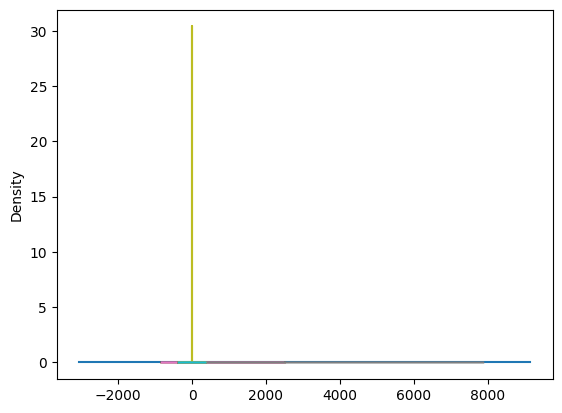

In [64]:
%%time
for i in num_col[:40]:
    start_time = time.time()
    print(i)
    df[i].plot(kind='kde')
    end_time = start_time = time.time()
    print('for {} it took {} seconds'.format(i,end_time-start_time))

In [65]:
import random
number_of_colors = 4

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
         for i in range(number_of_colors)]

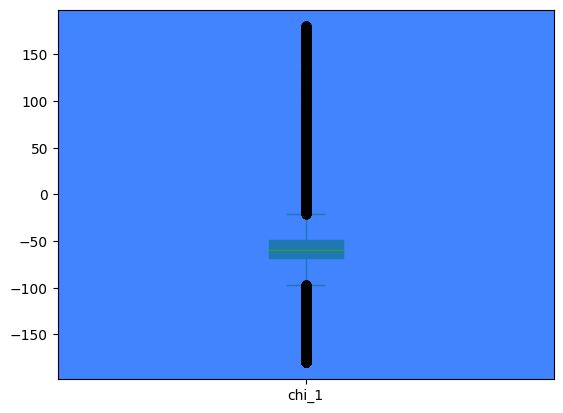

for chi_1 it took 0.0 seconds


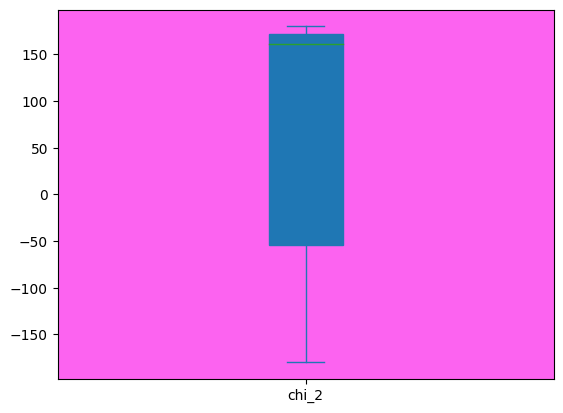

for chi_2 it took 0.0 seconds


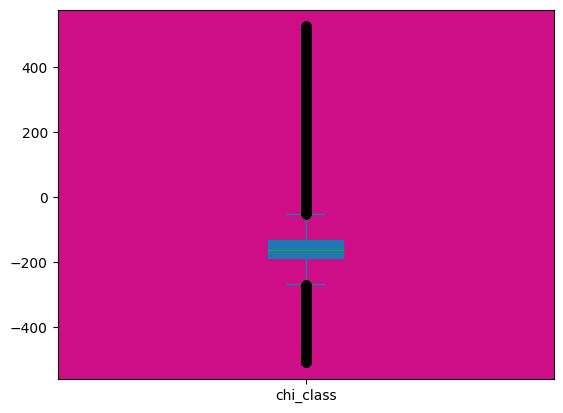

for chi_class it took 0.0 seconds


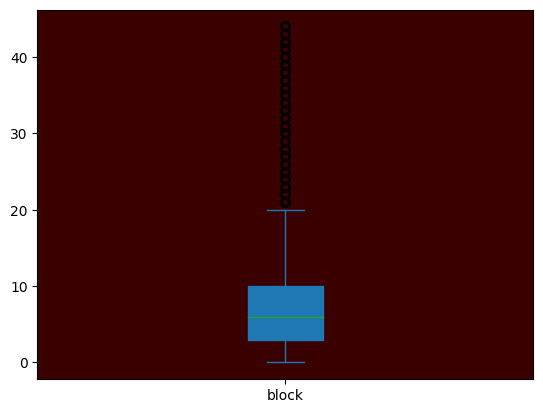

for block it took 0.0 seconds
CPU times: user 568 ms, sys: 291 ms, total: 859 ms
Wall time: 318 ms


In [66]:
%%time
count = 0
for i in ['chi_1', 'chi_2', 'chi_class', 'block']:
    start_time = time.time()
    b = df[i].plot.box(patch_artist=True)
    b.set_facecolor(color[count])
    plt.show()
    count = count + 1
    end_time = start_time = time.time()
    print('for {} it took {} seconds'.format(i,end_time-start_time))

## Задание 2.4. Обучим нашу модель!

Импортируйте библиотеку lightgbm. Если она не установлена, установить ее можно с помощью консольной команды pip:

In [30]:
!pip install lightgbm
import lightgbm as lgb

# Установить пакет так и не удалось, пыталась я очень долго, в том числе через brew, но на моем маке ничего не встало

In [44]:
from sklearn.metrics import * #accuracy_score

Разделите выборку на обучающую и тестовую в соотношении 0.7/0.3. 


В X должны быть все признаки, кроме Unnamed, pdb_id и всех столбцов со значениями углов $\chi$.


y - столбец дискретизированных значений $\chi_1$.

In [45]:
import re

In [46]:
col = df.columns.tolist()
col

['pbd_indx',
 'phi',
 'psi',
 'tau',
 'alpha',
 'ind_from_start',
 'ind_from_end',
 'sec_structure',
 'is_tail',
 'chi_1',
 'chi_2',
 'n_phi_1',
 'n_psi_1',
 'n_phi_2',
 'n_psi_2',
 'n_phi_3',
 'n_psi_3',
 'n_phi_4',
 'n_psi_4',
 'n_phi_5',
 'n_psi_5',
 'n_phi_6',
 'n_psi_6',
 'n_phi_7',
 'n_psi_7',
 'n_phi_8',
 'n_psi_8',
 'n_phi_9',
 'n_psi_9',
 'n_phi_10',
 'n_psi_10',
 'n_phi_11',
 'n_psi_11',
 'n_phi_12',
 'n_psi_12',
 'n_phi_13',
 'n_psi_13',
 'n_phi_14',
 'n_psi_14',
 'n_phi_15',
 'n_psi_15',
 'n_phi_16',
 'n_psi_16',
 'n_phi_17',
 'n_psi_17',
 'n_dist_1',
 'n_name_1',
 'n_dist_2',
 'n_name_2',
 'n_dist_3',
 'n_name_3',
 'n_dist_4',
 'n_name_4',
 'n_dist_5',
 'n_name_5',
 'n_dist_6',
 'n_name_6',
 'n_dist_7',
 'n_name_7',
 'n_dist_8',
 'n_name_8',
 'n_dist_9',
 'n_name_9',
 'n_dist_10',
 'n_name_10',
 'n_dist_11',
 'n_name_11',
 'n_dist_12',
 'n_name_12',
 'n_dist_13',
 'n_name_13',
 'n_dist_14',
 'n_name_14',
 'n_dist_15',
 'n_name_15',
 'n_dist_16',
 'n_name_16',
 'n_dist_17',

In [47]:
p = re.compile('chi*')
newlist = list(filter(p.match, col)) # Read Note below
print(newlist)

['chi_1', 'chi_2', 'chi_class']


In [48]:
df_x = df.loc[:,~df.columns.isin(['chi_1', 'chi_2', 'chi_class', 'block', 'pbd_indx'])]
df_x 

,phi,psi,tau,alpha,ind_from_start,ind_from_end,sec_structure,is_tail,n_phi_1,n_psi_1,...,gamma14,alpha15,beta15,gamma15,alpha16,beta16,gamma16,alpha17,beta17,gamma17
0,-132.673875,143.415464,131.682519,132.908004,10,109,3133.0,0,-148.001357,-67.992231,...,149.497815,41.249609,45.624462,87.362901,35.804617,97.974890,123.708933,43.206417,128.453892,80.477189
1,-58.525876,-46.093168,91.839903,39.513266,13,106,2738.0,0,157.271213,-65.320600,...,70.701617,40.707637,52.906550,59.405290,58.525391,125.539369,66.865025,43.699178,96.296884,52.406747
2,-65.144927,-32.202032,89.886732,49.391530,44,75,2738.0,0,-76.835747,-30.680678,...,53.288917,14.692650,113.218466,75.453066,54.015264,62.254251,70.714861,131.691470,92.295745,47.250501
3,-67.271147,-49.556771,94.279261,38.174192,85,34,2738.0,0,-67.401758,-20.736880,...,143.678835,109.953109,103.997430,31.013922,29.953156,90.677448,67.046059,68.871953,49.519534,64.581228
4,-67.401125,-38.312026,91.813249,57.449097,101,18,2738.0,0,-71.394747,-34.235373,...,82.929903,96.622779,105.015224,55.540807,54.778124,56.230851,144.518962,20.361839,10.698696,85.074644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63041,-121.353153,126.716381,124.146485,-144.929397,78,51,3647.0,0,118.552928,-153.733059,...,64.907875,38.871942,142.713770,98.575763,128.941322,45.503916,56.835975,68.407924,172.074909,94.987919
63042,-100.731831,101.492657,110.033866,143.276514,101,28,3133.0,0,176.937992,-176.145006,...,76.902411,63.606574,132.837890,66.013573,42.864891,97.835056,127.403928,42.556767,80.423456,132.556159
63043,-73.092971,-30.659857,91.436514,42.510484,106,23,400.0,0,-79.923981,-177.583511,...,70.162094,12.511955,125.127891,83.346626,71.770644,172.688151,93.315752,86.056729,30.563075,100.715354
63044,-46.594126,-55.146881,91.555714,40.063601,119,10,2738.0,0,-93.963239,-23.756345,...,55.692857,67.700760,105.615707,116.902444,59.775282,18.430398,82.098894,54.403891,50.741328,40.997152


In [49]:
X = df_x.values
y = df.loc[:,df.columns.isin(['block'])].values.ravel()

In [50]:
X

array([[-132.67387498,  143.41546352,  131.68251908, ...,   43.20641748,
         128.4538924 ,   80.47718884],
       [ -58.52587571,  -46.0931677 ,   91.83990305, ...,   43.69917806,
          96.29688367,   52.40674718],
       [ -65.1449267 ,  -32.20203155,   89.88673175, ...,  131.69147037,
          92.2957452 ,   47.25050077],
       ...,
       [ -73.09297121,  -30.65985714,   91.43651351, ...,   86.05672939,
          30.5630748 ,  100.71535354],
       [ -46.59412619,  -55.14688138,   91.5557145 , ...,   54.40389108,
          50.74132849,   40.99715181],
       [ -51.64837381,  -45.61318433,   90.00207684, ...,   56.68912894,
         168.92345991,   99.85388227]])

In [51]:
y

array([13., 20.,  6., ...,  1.,  0.,  8.])

In [52]:
X = np.delete(X, 1, axis=1)
# X_== X
X

array([[-132.67387498,  131.68251908,  132.90800425, ...,   43.20641748,
         128.4538924 ,   80.47718884],
       [ -58.52587571,   91.83990305,   39.51326581, ...,   43.69917806,
          96.29688367,   52.40674718],
       [ -65.1449267 ,   89.88673175,   49.3915298 , ...,  131.69147037,
          92.2957452 ,   47.25050077],
       ...,
       [ -73.09297121,   91.43651351,   42.51048448, ...,   86.05672939,
          30.5630748 ,  100.71535354],
       [ -46.59412619,   91.5557145 ,   40.06360094, ...,   54.40389108,
          50.74132849,   40.99715181],
       [ -51.64837381,   90.00207684,   61.43270772, ...,   56.68912894,
         168.92345991,   99.85388227]])

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Обучите модель, проверьте качество обучения на тестовой выборке (по метрике accuracy). Получилось ли хорошая модель?

# lgb

In [54]:
%%time
clf = lgb.LGBMClassifier(num_leaves=88,
                         min_child_samples=1358,
                         max_depth=16,
                         n_estimators=2170,
                         reg_lambda=702.599,
                         reg_alpha=28.532,
                         learning_rate=0.26461,
                         random_state=42
                        )

Wall time: 0 ns


In [55]:
print(X_train.shape, X_test.shape, y.shape)

(43977, 296) (18848, 296) (62825,)


In [60]:
%%time
clf = lgb.LGBMClassifier()

Wall time: 0 ns


In [61]:
%%time
clf.fit(X_train, y_train)

Wall time: 3min 5s


LGBMClassifier()

In [62]:
%%time
y_pred = clf.predict(X_test)

Wall time: 4.64 s


In [63]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred, y_test)
print("Test accuracy score:", accuracy)

Test accuracy score: 0.060324702886247875
